# load data & library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train = pd.read_csv("benz/train.csv", index_col="ID")
test = pd.read_csv("benz/test.csv", index_col="ID")
submission = pd.read_csv("benz/sample_submission.csv", index_col="ID")

train.shape, test.shape, submission.shape

((4209, 377), (4209, 376), (4209, 1))

In [3]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
4,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
submission.head()

,y
ID,
1,100.669318
2,100.669318
3,100.669318
4,100.669318
5,100.669318


# EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [7]:
train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# 고유값이 1개라면 제외해도 된다고 판단
train_nunique = train.nunique().sort_values()
train_nunique

X290       1
X235       1
X11        1
X297       1
X347       1
        ... 
X1        27
X5        29
X2        44
X0        47
y       2545
Length: 377, dtype: int64

In [9]:
train_one_idx = train_nunique[train_nunique == 1].index
train_one_idx

Index(['X290', 'X235', 'X11', 'X297', 'X347', 'X268', 'X107', 'X293', 'X330',
       'X289', 'X93', 'X233'],
      dtype='object')

In [10]:
# 고유값이 1개인 데이터 기술통계 조회
# 모든 값이 0인 것을 알 수 있음
train[train_one_idx].describe()

,X290,X235,X11,X297,X347,X268,X107,X293,X330,X289,X93,X233
count,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 고유값이 1개인 col 제거
# train 의 고유값 1개인 col 제거
# train 기준으로 제거
train = train.drop(columns=train_one_idx)
test = test.drop(columns=train_one_idx)

<AxesSubplot:ylabel='ID'>

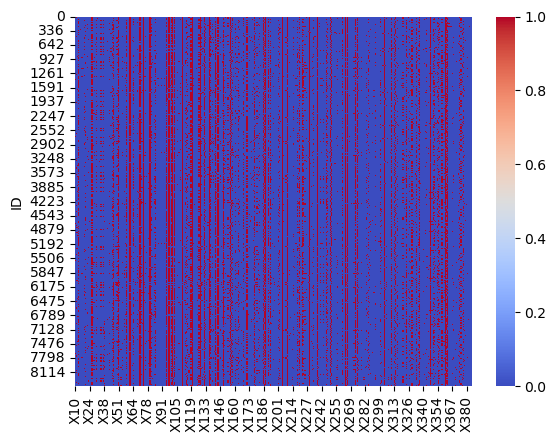

In [12]:
# y를 제외한 feature 들의 어떤 값이 크고 작은지 확인
# 수치 데이터가 너무 많아 기술통계 확인이 어려워 시각화
# 데이터들의 최솟값이 0 최댓값이 1인 모습
# 이미 Min-Max Scaling이 되어있는 모습
sns.heatmap(train.select_dtypes(include="number").drop(columns="y"), cmap="coolwarm")

# OneHotEncoding

In [13]:
# handle_unknown="ignore"
# test에는 등장하지만 train에 존재하지 않는 것은 무시
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary")
train_ohe = ohe.fit_transform(train.select_dtypes(exclude="number"))

In [20]:
train.index

Int64Index([   0,    6,    7,    9,   13,   18,   24,   25,   27,   30,
            ...
            8395, 8397, 8399, 8402, 8403, 8405, 8406, 8412, 8415, 8417],
           dtype='int64', name='ID', length=4209)

In [15]:
train_ohe.shape, test_ohe.shape

((4209, 195), (4209, 195))

In [16]:
train_ohe, ohe.get_feature_names_out()

(<4209x195 sparse matrix of type '<class 'numpy.float64'>'
 	with 33672 stored elements in Compressed Sparse Row format>,
 array(['X0_a', 'X0_aa', 'X0_ab', 'X0_ac', 'X0_ad', 'X0_af', 'X0_ai',
        'X0_aj', 'X0_ak', 'X0_al', 'X0_am', 'X0_ao', 'X0_ap', 'X0_aq',
        'X0_as', 'X0_at', 'X0_au', 'X0_aw', 'X0_ax', 'X0_ay', 'X0_az',
        'X0_b', 'X0_ba', 'X0_bc', 'X0_c', 'X0_d', 'X0_e', 'X0_f', 'X0_g',
        'X0_h', 'X0_i', 'X0_j', 'X0_k', 'X0_l', 'X0_m', 'X0_n', 'X0_o',
        'X0_q', 'X0_r', 'X0_s', 'X0_t', 'X0_u', 'X0_v', 'X0_w', 'X0_x',
        'X0_y', 'X0_z', 'X1_a', 'X1_aa', 'X1_ab', 'X1_b', 'X1_c', 'X1_d',
        'X1_e', 'X1_f', 'X1_g', 'X1_h', 'X1_i', 'X1_j', 'X1_k', 'X1_l',
        'X1_m', 'X1_n', 'X1_o', 'X1_p', 'X1_q', 'X1_r', 'X1_s', 'X1_t',
        'X1_u', 'X1_v', 'X1_w', 'X1_y', 'X1_z', 'X2_a', 'X2_aa', 'X2_ac',
        'X2_ae', 'X2_af', 'X2_ag', 'X2_ah', 'X2_ai', 'X2_ak', 'X2_al',
        'X2_am', 'X2_an', 'X2_ao', 'X2_ap', 'X2_aq', 'X2_ar', 'X2_as',
        'X2_at

In [14]:
test_ohe = ohe.transform(test.select_dtypes(exclude="number"))

/Users/jahyeon_gu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [21]:
train_ohe.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [17]:
df_train_ohe = pd.DataFrame(train_ohe.toarray(), columns=ohe.get_feature_names_out())

# index_col="ID" 했기 때문에 index 값 변경
df_train_ohe.index = train.index
df_train_ohe

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_test_ohe = pd.DataFrame(test_ohe.toarray(), columns=ohe.get_feature_names_out())

df_test_ohe.index = test.index
df_test_ohe

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# 수치형 데이터와 인코딩된 df를 concat
train_num = train.select_dtypes(include="number")
df_train = pd.concat([train_num, df_train_ohe], axis=1)
df_train.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,88.53,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,76.26,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,80.62,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,78.02,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# train 인코딩 전후 행의 수가 같은지 확인
train.shape, df_train.shape

((4209, 365), (4209, 552))

In [26]:
# test 도 수치형 데이터와 인코딩 df concat
test_num = test.select_dtypes(include="number")
df_test = pd.concat([test_num, df_test_ohe], axis=1)
df_test.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# row의 수가 같은지 확인
test.shape, df_test.shape

((4209, 364), (4209, 551))

In [29]:
# 숫자 이외의 데이터가 있는지 확인
# 숫자 이외 데이터는 모델에 사용할 수 없음
df_test.select_dtypes(exclude="number").head(2)

""
ID
1
2


# X, y split

In [31]:
df_train.head(3)

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,88.53,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,76.26,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# label과 feature 분리
X = df_train.drop(columns="y")
y = df_train["y"]

print(X.shape, y.shape)
display(X.head(2))
display(y.head(2))

(4209, 551) (4209,)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ID
0    130.81
6     88.53
Name: y, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# test set
X_test = df_test
X_test.shape

(4209, 551)

In [43]:
print(X_train.shape)
X_train.head(2)

(3367, 551)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
2011,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3690,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print(y_train.shape)
y_train.head(2)

(3367,)


ID
2011    88.96
3690    89.90
Name: y, dtype: float64

In [39]:
print(X_valid.shape)
X_valid.head(2)

(842, 551)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
2140,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
print(y_valid.shape)
y_valid.head(2)

(842,)


ID
2140    97.94
310     96.41
Name: y, dtype: float64

# 선형 회귀 모델

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model

LinearRegression(n_jobs=-1)

In [47]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [48]:
model.score(X_valid, y_valid)

-2.2836664887510944e+22

<AxesSubplot:xlabel='y'>

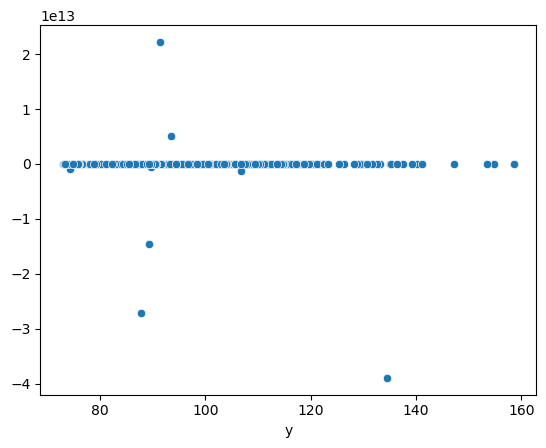

In [50]:
sns.scatterplot(x=y_valid, y=model.predict(X_valid))

In [51]:
y_predict = model.predict(X_test)
y_predict[:5]

array([-7.35144494e+12, -2.09749249e+11, -1.15846522e+12,  3.58177044e+12,
        9.48906250e+01])

# 제출

In [59]:
submission.head()

,y
ID,
1,-7.351445e+12
2,-2.097492e+11
3,-1.158465e+12
4,3.581770e+12
5,9.489062e+01


In [60]:
submission["y"] = y_predict

In [61]:
submission.to_csv("benz/submit.csv")

In [62]:
pd.read_csv("benz/submit.csv").head()

,ID,y
0,1,77.430928
1,2,105.511600
2,3,77.151800
3,4,77.930500
4,5,110.282500


In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_predict = model.predict(X_test)